# Objective
The goal of Milestone 2 is to translate and map chess openings into patterns, link these patterns to game outcomes, and include time and date information. This involves processing a large dataset of chess games to identify the openings played and correlate them with the outcomes of the games. The objective is to create a robust pattern mining framework that can handle incomplete data and still identify significant patterns.

# Code overview
Step 1: Import Libraries and Setup
This section imports the necessary libraries for data manipulation and visualisation. 

The sys library is used to modify the system path to include the directory where the ChessOpeningMapper module is located.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import zipfile
import os

# Add the path to the directory where ChessOpeningMapper.py is located. I had issues with the path, 
# so I went with the relative path. This will have to change.
sys.path.append('C:\\Users\\dak_d\\Desktop\\UNI SA\\Capstone 1\\UniSA_ICT_2024_SP4_P3_\\Chess Pattern Recognition')
# Import ChessOpeningMapper
from ChessOpeningMapper import ChessOpeningMapper

# Step 2: Load Opening Moves and Create Trie Structure.
# 
In this step, an instance of ChessOpeningMapper is created.

A list of file paths to the TSV files containing chess openings is defined.

These TSV files are merged into a single DataFrame using merge_tsv_files.

The PGN strings are split into individual moves using split_pgn_to_columns.

A Trie structure is created from the opening moves using create_trie.

In [2]:
# Create an instance of ChessOpeningMapper
mapper = ChessOpeningMapper()

# Define a list of file paths to the TSV files containing chess openings, I had issues with the path, so I have mapped them manually. 
file_list = [
    'C:\\Users\\dak_d\\Desktop\\UNI SA\\Capstone 1\\UniSA_ICT_2024_SP4_P3_\\Chess Pattern Recognition\\a.tsv',
    'C:\\Users\\dak_d\\Desktop\\UNI SA\\Capstone 1\\UniSA_ICT_2024_SP4_P3_\\Chess Pattern Recognition\\b.tsv',
    'C:\\Users\\dak_d\\Desktop\\UNI SA\\Capstone 1\\UniSA_ICT_2024_SP4_P3_\\Chess Pattern Recognition\\c.tsv',
    'C:\\Users\\dak_d\\Desktop\\UNI SA\\Capstone 1\\UniSA_ICT_2024_SP4_P3_\\Chess Pattern Recognition\\d.tsv',
    'C:\\Users\\dak_d\\Desktop\\UNI SA\\Capstone 1\\UniSA_ICT_2024_SP4_P3_\\Chess Pattern Recognition\\e.tsv'
]

# Merge the TSV files into a single DataFrame
opening_moves = mapper.merge_tsv_files(file_list)

# Split the PGN strings into individual moves
opening_moves = mapper.split_pgn_to_columns(opening_moves)

# Create a Trie structure from the opening moves
mapper.create_trie(opening_moves)

# Display the first few rows of the opening moves DataFrame
print("Opening Moves DataFrame:")
print(opening_moves.head())

Opening Moves DataFrame:
   eco                                     name  \
0  A00                             Amar Opening   
1  A00               Amar Opening: Paris Gambit   
2  A00  Amar Opening: Paris Gambit, Gent Gambit   
3  A00                         Amsterdam Attack   
4  A00                      Anderssen's Opening   

                                                 pgn Move_ply_1 Move_ply_2  \
0                                             1. Nh3        Nh3       None   
1                           1. Nh3 d5 2. g3 e5 3. f4        Nh3         d5   
2  1. Nh3 d5 2. g3 e5 3. f4 Bxh3 4. Bxh3 exf4 5. ...        Nh3         d5   
3             1. e3 e5 2. c4 d6 3. Nc3 Nc6 4. b3 Nf6         e3         e5   
4                                              1. a3         a3       None   

  Move_ply_3 Move_ply_4 Move_ply_5 Move_ply_6 Move_ply_7  ... Move_ply_28  \
0       None       None       None       None       None  ...        None   
1         g3         e5         f4       None

# Step 4: Unzip and Load Chess Game Data
This step involves:

Defining the path to the zipped game data file.

Unzipping the game data file to extract the CSV file.

Loading the extracted CSV file into a DataFrame.

In [3]:
# Define the path to the zipped game data file
game_data_zip_path = 'C:\\Users\\dak_d\\Desktop\\UNI SA\\Capstone 1\\UniSA_ICT_2024_SP4_P3_\\Chess Pattern Recognition\\chessdata.zip'

# Define the name of the extracted CSV file
extracted_file_name = 'chessdata.csv'

# Unzip the game data file
ChessOpeningMapper.unzip_game_data(zip_path=game_data_zip_path, extract_to='.')

# Load the extracted CSV file into a DataFrame
game_data = ChessOpeningMapper.load_game_data(zip_path=game_data_zip_path, extracted_file_name=extracted_file_name)

# Display the first few rows of the game data DataFrame
print("Game Data DataFrame:")
print(game_data.head())



C:\Users\dak_d\Desktop\UNI SA\Capstone 1\UniSA_ICT_2024_SP4_P3_\Chess Pattern Recognition\ChessOpeningMapper.py:104: DtypeWarning: Columns (188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408) have mixed types. Specify dtype option on import or set low_memory=False.
  game_data = pd.read_csv(extracted_file_name)


Game Data DataFrame:
   Index        Date  ECO                                 Opening Result  \
0      0  2019.04.30  B15                       Caro-Kann Defense    0-1   
1      1  2019.04.30  C50                            Italian Game    0-1   
2      2  2019.04.30  C41                     Philidor Defense #2    1-0   
3      3  2019.04.30  B06                          Modern Defense    0-1   
4      4  2019.04.30  B32  Sicilian Defense: Loewenthal Variation    1-0   

  Termination TimeControl     UTCDate   UTCTime Move_ply_1  ... Clock_ply_192  \
0      Normal       300+3  2019.04.30  22:00:24         d4  ...           NaN   
1      Normal       300+0  2019.04.30  22:00:13         e4  ...           NaN   
2      Normal       600+0  2019.04.30  22:00:41         e4  ...           NaN   
3      Normal        60+0  2019.04.30  22:00:43         e4  ...           NaN   
4      Normal       180+0  2019.04.30  22:00:46         e4  ...           NaN   

  Clock_ply_193 Clock_ply_194 Clock

# Step 5: Map Opening Names to Game Data

Here:

The game data is processed to map the move sequences to opening names using get_opening_name_from_game.

The mapped opening names are added to the original game data DataFrame in a new column called mapped_opening.


In [4]:
# Map the opening names to the game data
result_df = mapper.get_opening_name_from_game(game_data)

# Add the mapped opening names to the original game data DataFrame
game_data['mapped_opening'] = result_df['opening_name']

# Display the first 5 rows of the updated game data DataFrame
print(f"First 5 rows with mapped openings: \n{game_data.head()}")


First 5 rows with mapped openings: 
   Index        Date  ECO                                 Opening Result  \
0      0  2019.04.30  B15                       Caro-Kann Defense    0-1   
1      1  2019.04.30  C50                            Italian Game    0-1   
2      2  2019.04.30  C41                     Philidor Defense #2    1-0   
3      3  2019.04.30  B06                          Modern Defense    0-1   
4      4  2019.04.30  B32  Sicilian Defense: Loewenthal Variation    1-0   

  Termination TimeControl     UTCDate   UTCTime Move_ply_1  ... Clock_ply_193  \
0      Normal       300+3  2019.04.30  22:00:24         d4  ...           NaN   
1      Normal       300+0  2019.04.30  22:00:13         e4  ...           NaN   
2      Normal       600+0  2019.04.30  22:00:41         e4  ...           NaN   
3      Normal        60+0  2019.04.30  22:00:43         e4  ...           NaN   
4      Normal       180+0  2019.04.30  22:00:46         e4  ...           NaN   

  Clock_ply_194 Cloc

# Step 6: Filter and Count Unexpected Outcomes

#This step filters the game data to include only expected outcomes ('1-0', '0-1', '1/2-1/2') and drops any rows with unexpected outcomes.


In [5]:
# Define the expected outcomes
expected_outcomes = {'1-0', '0-1', '1/2-1/2'}

# Filter the game data to include only the expected outcomes
unexpected_outcomes = game_data[~game_data['Result'].isin(expected_outcomes)]

# Display the count of unexpected outcomes
print(f"Unexpected outcome values: \n{unexpected_outcomes['Result'].value_counts()}")

# Drop the rows with unexpected outcomes from the game data
game_data = game_data[game_data['Result'].isin(expected_outcomes)]

Unexpected outcome values: 
*    5
Name: Result, dtype: int64


# Step 7: Link Patterns to Outcomes

In this part:

A dictionary pattern_outcome is created to map move patterns to game outcomes.

The game data is iterated over, and for each row, the sequence of moves is extracted and added to the dictionary along with the outcome.


In [6]:
# Create a dictionary to map move patterns to game outcomes
pattern_outcome = {}

# Iterate over the game data
for index, row in game_data.iterrows():
    # Extract the sequence of moves
    moves = tuple(row[f'Move_ply_{i}'] for i in range(1, 51))
    outcome = row['Result']
    
    # Initialise the pattern if it doesn't exist in the dictionary
    if moves not in pattern_outcome:
        pattern_outcome[moves] = {'1-0': 0, '0-1': 0, '1/2-1/2': 0}
    
    # Increment the count for the corresponding outcome
    pattern_outcome[moves][outcome] += 1

# Display the outcomes for the first few patterns
for pattern, outcomes in list(pattern_outcome.items())[:5]:
    print(f"Pattern: {pattern}")
    print(f"  Outcomes: {outcomes}")

Pattern: ('d4', 'd5', 'Nc3', 'c6', 'e4', 'h5', 'exd5', 'cxd5', 'Qf3', 'Bg4', 'Qf4', 'e6', 'Bb5+', 'Nc6', 'f3', 'Bd6', 'Qe3', 'Bf5', 'a4', 'a6', 'Bd3', 'Bxd3', 'Qxd3', 'Nb4', 'Qe3', 'Nxc2+', 'Kd1', 'Nxe3+', 'Bxe3', 'f5', 'Nh3', 'Ne7', 'f4', 'Qb6', 'Rb1', 'Ng6', 'g3', 'O-O-O', 'Ng5', 'Qb3+', 'Kd2', 'b5', 'a5', 'b4', 'Ne2', 'Kb7', 'Nf7', 'Rc8', 'Nxd6+', 'Kb8')
  Outcomes: {'1-0': 0, '0-1': 1, '1/2-1/2': 0}
Pattern: ('e4', 'e5', 'Nf3', 'Nc6', 'Bc4', 'd6', 'Nc3', 'h6', 'd4', 'exd4', 'Nxd4', 'Nf6', 'Nxc6', 'bxc6', 'e5', 'dxe5', 'Qxd8+', 'Kxd8', 'O-O', 'Be6', 'Bxe6', 'fxe6', 'Rd1+', 'Bd6', 'Be3', 'Ng4', 'Ne4', 'Nxe3', 'fxe3', 'Ke7', 'c4', 'c5', 'g4', 'g5', 'Kg2', 'Rab8', 'b3', 'a5', 'Rab1', 'h5', 'Kg3', 'hxg4', 'Nxg5', 'e4+', 'Kg2', 'Rxh2+', 'Kg1', 'Rxa2', 'Nxe4', 'Be5')
  Outcomes: {'1-0': 0, '0-1': 1, '1/2-1/2': 0}
Pattern: ('e4', 'e5', 'Nf3', 'd6', 'c3', 'Be7', 'd4', 'exd4', 'cxd4', 'Nf6', 'Bd3', 'h6', 'O-O', 'O-O', 'Nc3', 'Nc6', 'a3', 'Bg4', 'Bc2', 'Bxf3', 'gxf3', 'Nh7', 'Be3', 'Bf6', 'Kh

# Step 8: Visualisation of Patterns and Outcomes

Here:

The pattern_outcome dictionary is converted to a DataFrame.

The columns are adjusted to include move patterns and outcomes.

The DataFrame is merged with the opening names.

Rows with NaN values in the 'name' column are dropped.

The frequency of each opening name is counted.

In [7]:
# Convert the pattern_outcome dictionary to a DataFrame
pattern_outcome_df = pd.DataFrame.from_dict(pattern_outcome, orient='index').reset_index()

# Define the move columns
move_columns = [f'Move_{i}' for i in range(1, 51)]

# Adjust the column names to include move patterns and outcomes
pattern_outcome_df.columns = move_columns + ['1-0', '0-1', '1/2-1/2']

# Combine the move columns into a single 'Pattern' column
pattern_outcome_df['Pattern'] = pattern_outcome_df[move_columns].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# Drop the individual move columns
pattern_outcome_df = pattern_outcome_df.drop(columns=move_columns)

# Standardize the 'plies' column format in opening_moves
opening_moves['plies'] = opening_moves['plies'].str.strip()

# Merge the pattern_outcome DataFrame with the opening names
pattern_outcome_df = pattern_outcome_df.merge(opening_moves[['plies', 'name']], left_on='Pattern', right_on='plies', how='left')

# Display the adjusted DataFrame after merging with opening names
print("Adjusted DataFrame after merging with opening names:")
print(pattern_outcome_df.head())

# Check for NaN values in the 'name' column
nan_names = pattern_outcome_df[pattern_outcome_df['name'].isna()]
print(f"Rows with NaN 'name' values: {len(nan_names)}")
print(nan_names.head())

# Drop rows with NaN 'name' values
pattern_outcome_df = pattern_outcome_df.dropna(subset=['name'])

# Count the frequency of each opening name
opening_counts = pattern_outcome_df['name'].value_counts().reset_index()
opening_counts.columns = ['name', 'count']

# Display the opening counts
print("Opening Counts:")
print(opening_counts.head())

Adjusted DataFrame after merging with opening names:
   1-0  0-1  1/2-1/2                                            Pattern plies  \
0    0    1        0  d4 d5 Nc3 c6 e4 h5 exd5 cxd5 Qf3 Bg4 Qf4 e6 Bb...   NaN   
1    0    1        0  e4 e5 Nf3 Nc6 Bc4 d6 Nc3 h6 d4 exd4 Nxd4 Nf6 N...   NaN   
2    1    0        0  e4 e5 Nf3 d6 c3 Be7 d4 exd4 cxd4 Nf6 Bd3 h6 O-...   NaN   
3    0    1        0  e4 g6 d4 h6 Nc3 Bg7 Nge2 e6 f3 Ne7 Be3 O-O Qd2...   NaN   
4    1    0        0  e4 c5 Nf3 Nc6 d4 cxd4 Nxd4 e5 Nb5 a6 Nd6+ Bxd6...   NaN   

  name  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  
Rows with NaN 'name' values: 199904
   1-0  0-1  1/2-1/2                                            Pattern plies  \
0    0    1        0  d4 d5 Nc3 c6 e4 h5 exd5 cxd5 Qf3 Bg4 Qf4 e6 Bb...   NaN   
1    0    1        0  e4 e5 Nf3 Nc6 Bc4 d6 Nc3 h6 d4 exd4 Nxd4 Nf6 N...   NaN   
2    1    0        0  e4 e5 Nf3 d6 c3 Be7 d4 exd4 cxd4 Nf6 Bd3 h6 O-...   NaN   
3    0    1        0  e4 g6 d4 h6 Nc3 Bg7 Nge2

# Step 9: Visualisation


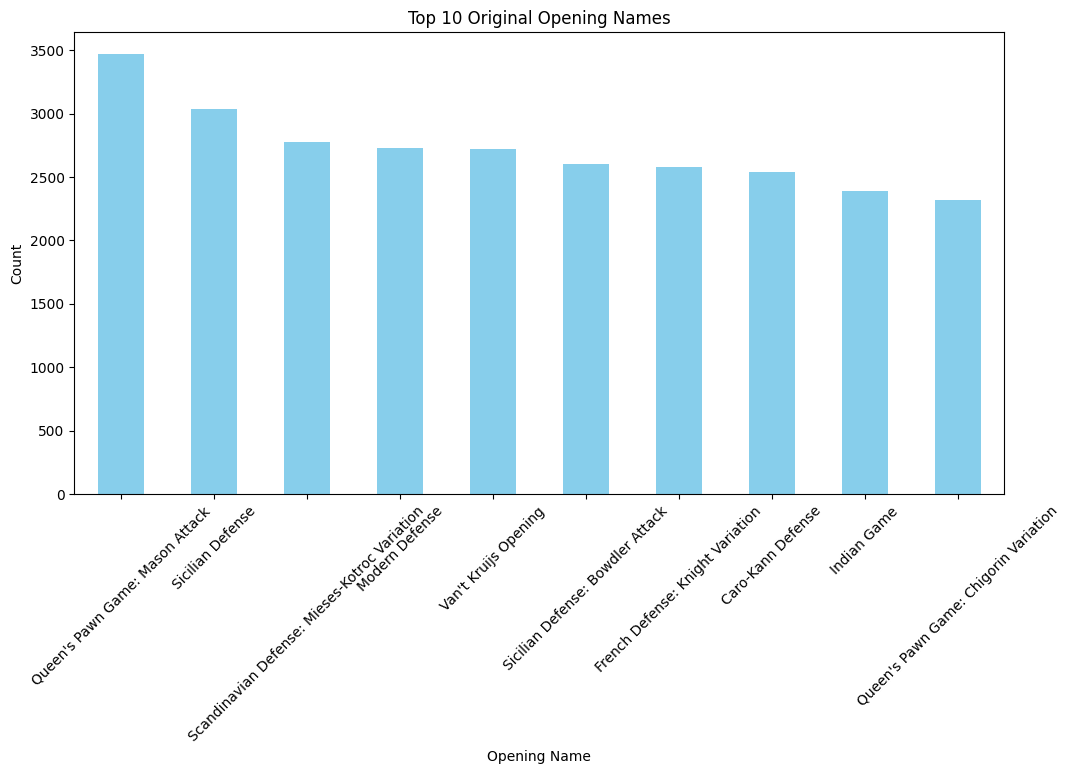

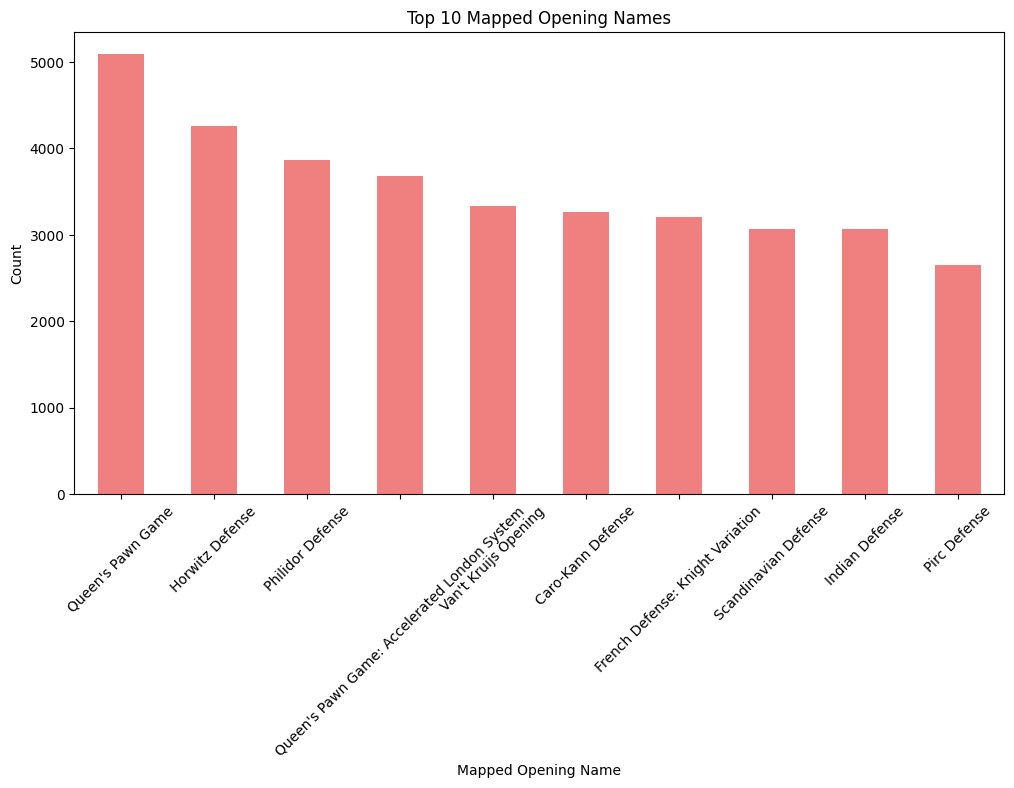

In [8]:
#### Top 10 Original Opening Names
# Count the frequency of each original opening name
original_opening_counts = game_data['Opening'].value_counts().reset_index()
original_opening_counts.columns = ['Opening', 'count']

# Plot the top 10 original opening names
plt.figure(figsize=(12, 6))
original_opening_counts.head(10).set_index('Opening')['count'].plot(kind='bar', color='skyblue')
plt.title('Top 10 Original Opening Names')
plt.xlabel('Opening Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Top 10 Mapped Opening Names
# Count the frequency of each mapped opening name
mapped_opening_counts = game_data['mapped_opening'].value_counts().reset_index()
mapped_opening_counts.columns = ['mapped_opening', 'count']

# Plot the top 10 mapped opening names
plt.figure(figsize=(12, 6))
mapped_opening_counts.head(10).set_index('mapped_opening')['count'].plot(kind='bar', color='lightcoral')
plt.title('Top 10 Mapped Opening Names')
plt.xlabel('Mapped Opening Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Step 10: Write the Updated Data to CSV and Zip It

In [9]:
# I have removed this due to the zip file being too large
# Write the updated game data to a CSV file
# output_csv_path = 'updated_chessdata.csv'
# game_data.to_csv(output_csv_path, index=False)

# # Zip the csv file
# #output_zip_path = 'updated_chessdata.zip'
# with zipfile.ZipFile(output_zip_path, 'w') as zipf:
#     zipf.write(output_csv_path)

# # Remove the original CSV file after zipping
# os.remove(output_csv_path)

# Remove the original extracted chessdata.csv file
os.remove(extracted_file_name)

# Linking Back to Milestone 2
Milestone 2 aims to link patterns in chess openings to game outcomes. The provided code achieves this by:

Data Preparation: Loading and processing chess openings and game data.

Mapping Openings: Using a Trie structure to efficiently map move sequences to opening names.

Pattern-Outcome Linking: Creating a dictionary to map move patterns to outcomes.

These steps collectively fulfill the objective of identifying and visualising the impact of different chess openings on game outcomes, even with potentially incomplete data.